# Assignment 1

## Prepare San Francisco crime dataframe

In [20]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import *
import folium
from folium import plugins
import seaborn as sns

In [2]:
#read crime-data file
with open('/Users/Anna/incidents.csv','r') as infile:
    df=pd.read_csv(infile)

In [3]:
#insert datetime column as index
df = df.set_index(df.Date + ' ' + df.Time)

#convert index to pandas datetime format
df.index = pd.to_datetime(df.index, format = '%m/%d/%Y %H:%M')

## Part 1: Temporal evolution of focus crimes

In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [29]:
#filter focuscrimes into new dataframe
focus_df = df[df.Category.isin(focuscrimes)]

#group by category and year, and count incidents
focus_df_year = focus_df.groupby(['Category', focus_df.index.year]).count()['IncidntNum']

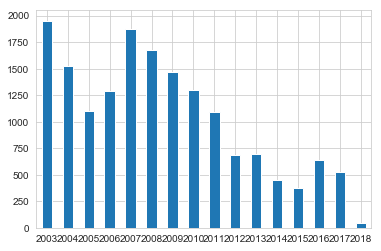

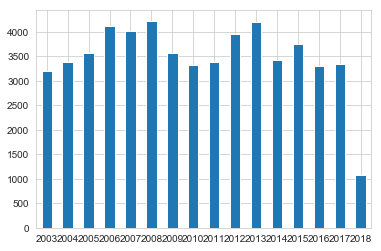

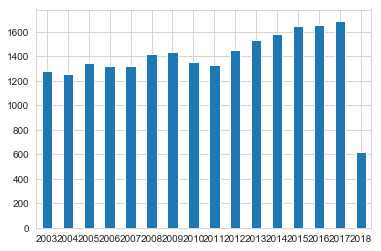

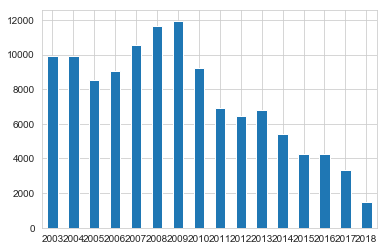

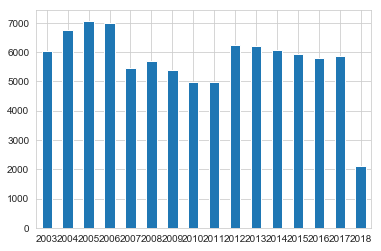

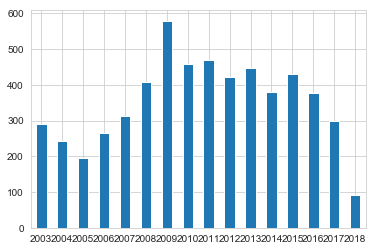

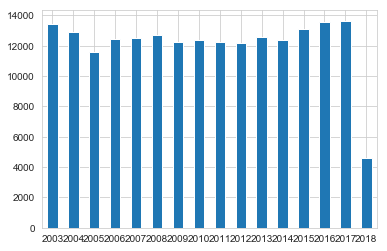

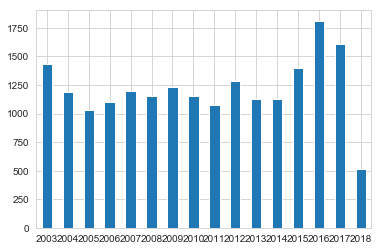

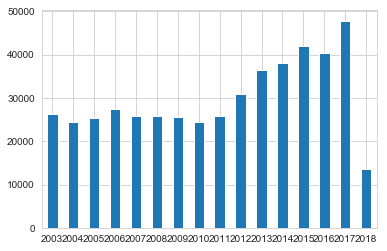

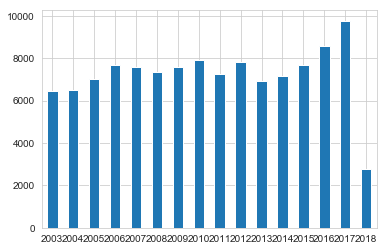

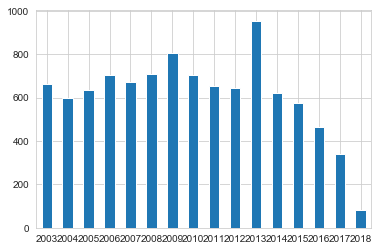

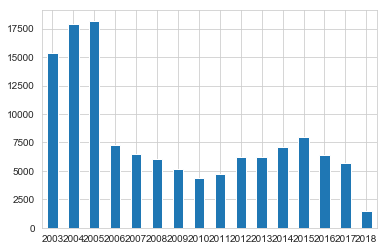

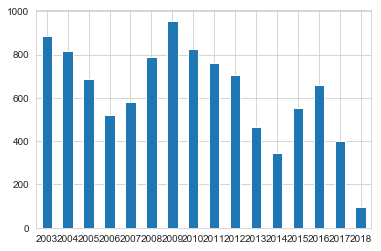

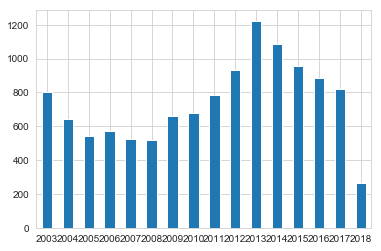

<Figure size 432x288 with 0 Axes>

In [30]:
for crime in focuscrimes:
    ax = focus_df_year[crime].plot.bar(x='lab', y='val', rot=0)
    plt.figure()
    #plt.plot(i)
#plt.show


## Part 2: Visualizing geo-data

In [7]:
#filter categories into new dataframe
subset_df = df[(df['Category'] == 'LARCENY/THEFT')|(df['Category'] == 'DRUG/NARCOTIC')]

In [8]:
#filter dates
start = pd.to_datetime('2016-06-01')
stop = pd.to_datetime('2016-07-31')
subset_df = subset_df.loc[(subset_df.index > start) & (subset_df.index <= stop)]

In [69]:
#map of SF
fgv = folium.FeatureGroup(name = "San Francisco")
SFmap = folium.Map([37.773972, -122.431297], zoom_start = 13)

In [70]:
#initialize categories and colors 
categories = ['LARCENY/THEFT', 'DRUG/NARCOTIC']
colors = ['blue', 'red']

#iterate through categories and add geodata to map
for crime, color in zip(categories, colors):
    for index, row in subset_df[subset_df.Category == crime].iterrows():
        folium.CircleMarker(location = [row['Y'], row['X']],
                            radius = 2,
                            color = color,
                            fill_color = color,).add_to(SFmap)

In [71]:
#plot scatter-map
SFmap

In [12]:
#reset map of SF
fgv = folium.FeatureGroup(name = "San Francisco")
SFmap = folium.Map([37.773972, -122.431297], zoom_start = 13)


In [13]:
#initialize categories
categories = ['LARCENY/THEFT', 'DRUG/NARCOTIC']

#iterate through categories and add geodata to map
for cat in categories:
    cat_df = subset_df[subset_df.Category == cat]
    SFmap.add_child(plugins.HeatMap(cat_df[['Y','X']].values, radius=15))
    
'''missing variuos paramters of heatmap!'''    

'missing variuos paramters of heatmap!'

In [14]:
#plot heat-map
SFmap

## Part 3: Some single variable plots

In [15]:
pros_df = df[df.Category == 'PROSTITUTION'] 
drug_df = df[df.Category == 'DRUG/NARCOTIC'] 

In [16]:
pros_start = pd.to_datetime('2012-01-01 12:00:00')
pros_stop = pd.to_datetime('2018-01-01 12:00:00')
pros_df = pros_df.loc[(pros_df.index > pros_start) & (pros_df.index <= pros_stop)]

drug_start = pd.to_datetime('2015-01-01 12:00:00')
drug_stop = pd.to_datetime('2017-01-01 12:00:00')
drug_df = drug_df.loc[(drug_df.index > drug_start) & (drug_df.index <= drug_stop)]

#print(len(pros_df))
#print(len(drug_df))

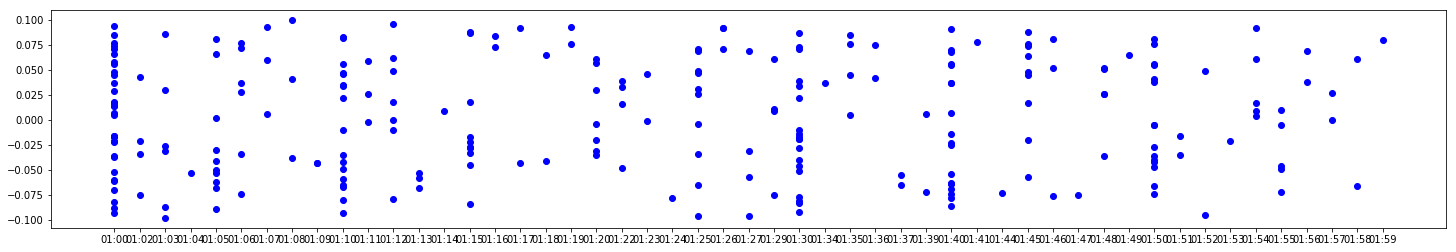

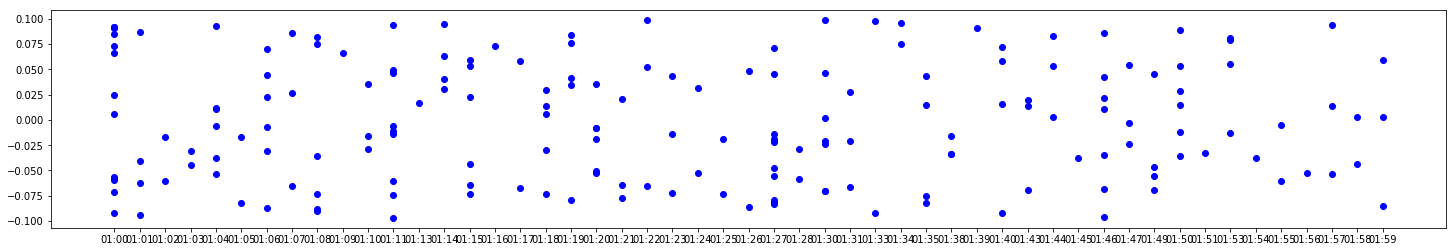

In [17]:
x=pros_df[pros_df.index.hour == 1].Time.sort_values()
y=[uniform(-0.1, 0.1) for i in range(len(x))]
fig=plt.figure(figsize=(25,4))
plt.plot(x, y, 'o', color='blue');

x=drug_df[drug_df.index.hour == 1].Time.sort_values()
y=[uniform(-0.1, 0.1) for i in range(len(x))]
fig=plt.figure(figsize=(25,4))
plt.plot(x, y, 'o', color='blue');

<Figure size 432x288 with 0 Axes>

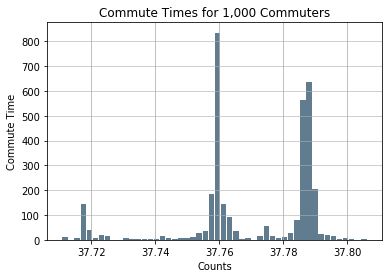

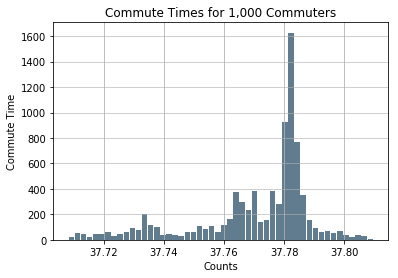

<Figure size 432x288 with 0 Axes>

In [18]:
'''is Y latitude?'''

commutes = pros_df['Y']

commutes.plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)
plt.figure()

commutes = drug_df['Y']

commutes.plot.hist(grid=True, bins=50, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)
plt.figure()


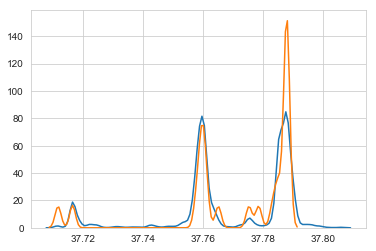

In [25]:
data = pros_df['Y']
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.001)

data = pros_df['Y'].sample(n=25, random_state=1)
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.001)



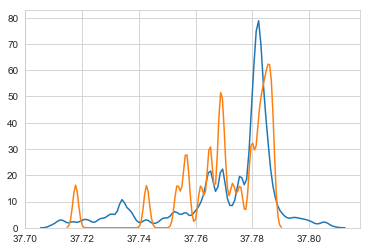

In [67]:
data = drug_df['Y']
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.001)

data = drug_df['Y'].sample(n=25, random_state=1)
sns.set_style('whitegrid')
sns.kdeplot(np.array(data), bw=0.001)



In [64]:
focus_df_date = focus_df.groupby(['Category', focus_df.index.date]).count()['IncidntNum']


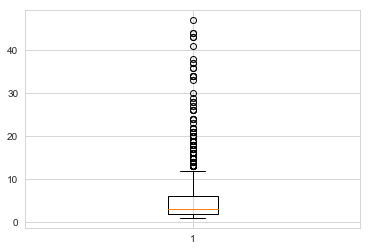

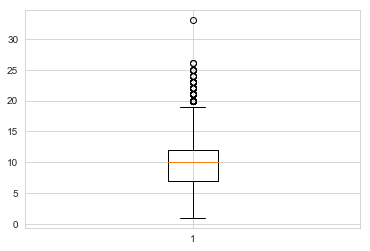

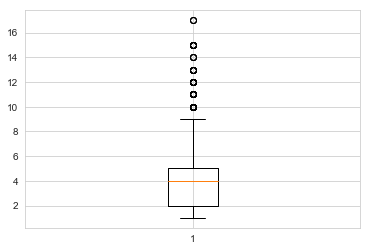

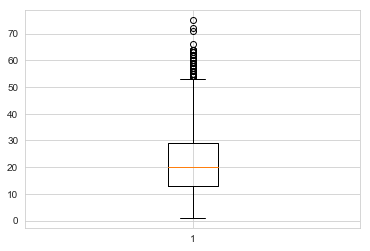

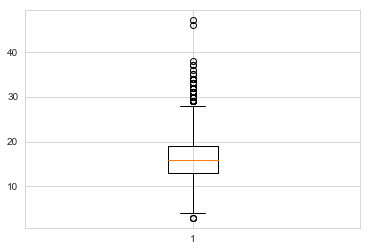

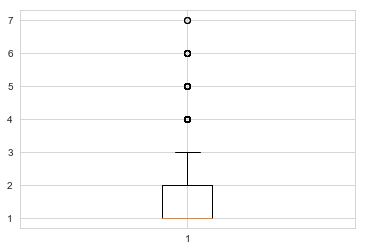

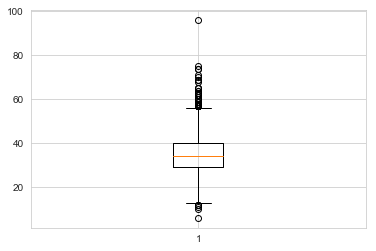

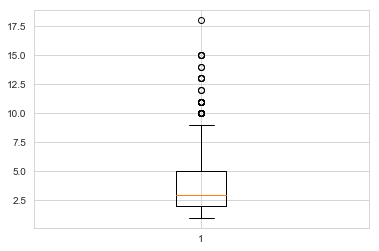

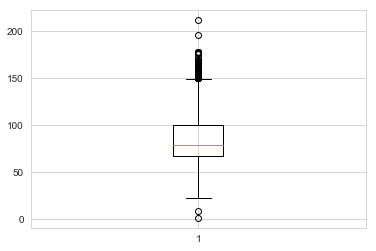

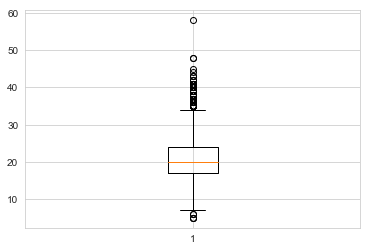

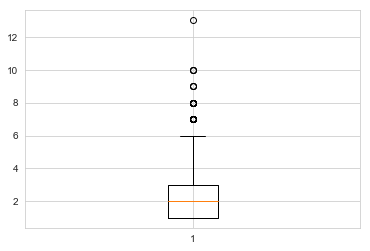

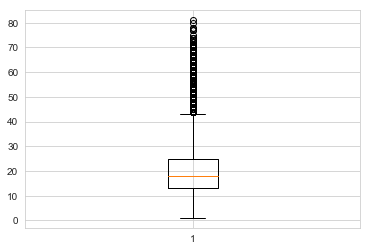

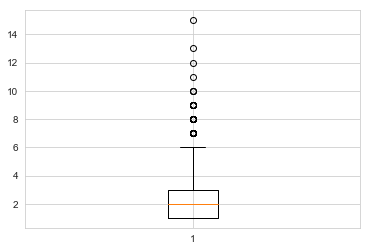

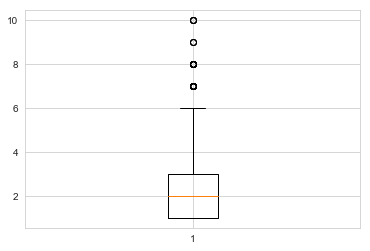

In [68]:
for crime in focuscrimes:
    plt.boxplot(focus_df_date[crime])
    plt.show()

In [61]:
'''check for correctness'''
focus_df_date['PROSTITUTION'].describe()

count    3506.000000
mean        4.763548
std         4.719008
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        47.000000
Name: IncidntNum, dtype: float64